In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Quercus/Qpetraea_GM_Oulu_filtered_v2.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Quercus/Qpetraea_GM_Oulu_filtered_v2.h5', fields='*', overwrite=True)

In [3]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Quercus/Qpetraea_GM_Oulu_filtered_v2.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Qpetraea_GM_Oulu_filtered_v2.h5" (mode r)>

In [4]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [5]:
calldata = callset['calldata']

In [6]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT','DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(885234,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=60.8M cbytes=21.4M cratio=2.8
   values=h5py._hl.group.Group>

In [7]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Quercus/samples_Quercus_GM_v2.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples.head()

,ID,Population
0,CH_QP_05_01,CH_QP_5
1,CH_QP_05_02,CH_QP_5
2,CH_QP_05_03,CH_QP_5
3,CH_QP_05_04,CH_QP_5
4,CH_QP_05_05,CH_QP_5


In [8]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(885234, 485, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=818.9M cbytes=65.0M cratio=12.6
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [10]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(885234, 2) dtype=int32 chunks=(55328, 2)
   nbytes=6.8M cbytes=2.0M cratio=3.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [11]:
samples.Population.value_counts()

GB_QP_11    25
IT_QP_9     25
GB_QP_12    25
DE_QP_17    25
LT_QP_20    25
IT_QP_8     25
NO_QP_14    25
ES_QP_2     25
FR_QP_3     25
IT_QP_10    25
ES_QP_1     25
CH_QP_5     25
CH_QP_6     25
IT_QP_7     24
FR_QP_4     24
NO_QP_13    24
DE_QP_18    24
SE_QP_16    23
SE_QP_15    22
PO_QP_19    19
Name: Population, dtype: int64

In [12]:
samples

,ID,Population
0,CH_QP_05_01,CH_QP_5
1,CH_QP_05_02,CH_QP_5
2,CH_QP_05_03,CH_QP_5
3,CH_QP_05_04,CH_QP_5
4,CH_QP_05_05,CH_QP_5
...,...,...
480,SE_QP_16_20,SE_QP_16
481,SE_QP_16_21,SE_QP_16
482,SE_QP_16_22,SE_QP_16
483,SE_QP_16_23,SE_QP_16


In [13]:
samples.Population.unique()

array(['CH_QP_5', 'CH_QP_6', 'DE_QP_17', 'DE_QP_18', 'ES_QP_1', 'ES_QP_2',
       'FR_QP_3', 'FR_QP_4', 'GB_QP_11', 'GB_QP_12', 'IT_QP_7', 'IT_QP_8',
       'IT_QP_9', 'IT_QP_10', 'LT_QP_20', 'NO_QP_13', 'NO_QP_14',
       'PO_QP_19', 'SE_QP_15', 'SE_QP_16'], dtype=object)

In [19]:
populations = samples.Population.unique()

In [21]:
palette = sns.color_palette("hls", 35)
pop_colours = {'CH_QP_5': palette[33],
                 'CH_QP_6': palette[2],
                 'DE_QP_17': palette[30],
                 'DE_QP_18': palette[4],
                 'ES_QP_1': palette[6],
                 'ES_QP_2': palette[0],
                 'FR_QP_3': palette[8],
                 'FR_QP_4': palette[16],
                 'GB_QP_11': palette[23],
                 'GB_QP_12': palette[11],
                 'IT_QP_7': palette[20],
                 'IT_QP_8': palette[13],
                 'IT_QP_9': palette[34],
                 'IT_QP_10': palette[29],
                 'LT_QP_20': palette[17],
                 'NO_QP_13': palette[28],
                 'NO_QP_14': palette[19],
                 'PO_QP_19': palette[12],
                 'SE_QP_15': palette[27],
                 'SE_QP_16': palette[10]}

In [15]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=0.97)

In [16]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(695476, 485) dtype=int8 chunks=(2717, 485)
   nbytes=321.7M cbytes=54.7M cratio=5.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [17]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

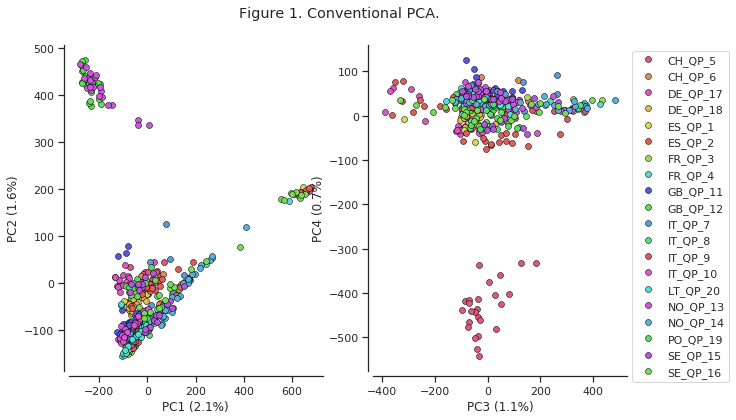

In [22]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [24]:
weirdos = coords1[:,1]<-200
samples[weirdos]

,ID,Population
4,AT-QP-22-05,AT-QP-22
78,DE-QP-17-04,DE-QP-17
88,DE-QP-17-14,DE-QP-17
91,DE-QP-17-17,DE-QP-17
92,DE-QP-17-18,DE-QP-17
279,GB-QP-12-05,GB-QP-12
280,GB-QP-12-06,GB-QP-12
490,PO-QP-19-7,PO-QP-19
492,PO-QP-19-9,PO-QP-19
520,SE-QP-15-03,SE-QP-15


In [25]:
samples2 = samples[~weirdos]

In [26]:
allT = np.repeat(True, len(genotypes_subset_2))

In [27]:
genotypes_subset_3 = genotypes_subset_2.subset(allT, ~weirdos)

In [28]:
ac3 = genotypes_subset_3.count_alleles()
ac3

<AlleleCountsChunkedArray shape=(721418, 2) dtype=int32 chunks=(45089, 2)
   nbytes=5.5M cbytes=1.9M cratio=2.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [32]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples2.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [29]:
flt2 = (ac3[:, :2].min(axis=1) > 1)
gf2 = genotypes_subset_3.compress(flt2, axis=0)
gn2 = gf2.to_n_alt()

In [30]:
coords2, model2 = allel.pca(gn2, n_components=10, scaler='patterson')

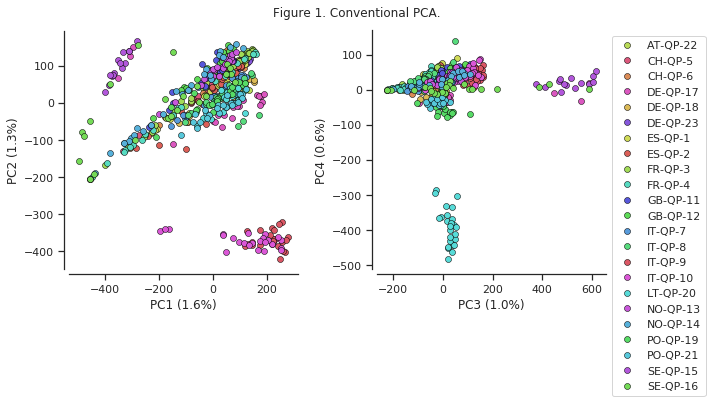

In [33]:
fig_pca(coords2, model2, 'Figure 1. Conventional PCA.')